In [2]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import itertools
import collections
import tweepy as tw
import nltk
from nltk.corpus import stopwords
import re
import warnings
import itertools
import collections

from nltk import bigrams

import networkx as nx

warnings.filterwarnings("ignore")
sns.set(font_scale=1.5)
sns.set_style("whitegrid")

In [3]:
mr = pd.read_csv("IMDB Dataset.csv")
#hmlt tag
mr['review'] = mr['review'].replace({'<.*?>': ''}, regex = True)
# lower case
mr['review'] = mr['review'].str.lower()
mr.head()

,review,sentiment
0,one of the other reviewers has mentioned that ...,positive
1,a wonderful little production. the filming tec...,positive
2,i thought this was a wonderful way to spend ti...,positive
3,basically there's a family where a little boy ...,negative
4,"petter mattei's ""love in the time of money"" is...",positive


In [4]:
mr = pd.read_csv("IMDB Dataset.csv")
def preprocess_text(data):
    stop = stopwords.words('english')
    punct = '''!"#$%&'()*+,-/:;<=>?@[\]^_`{|}~'''
    #print(stop)
    data['review'] = data['review'].replace({'<.*?>': ''}, regex = True)  
    #Make lower
    data['review'] = data['review'].str.lower()
    #Remove stopwords
    data['review'] = data['review'].apply(lambda x:' '.join([words for words in x.split() if words not in stop]))
    #Remove punctuations
    data['review'] = data['review'].replace({'<.*?>': ' '}, regex = True)  
    data['review'] = data['review'].replace({'[^a-zA-Z]': ' '}, regex = True)
    data['review'] = data['review'].replace({'[0-9]': ' '}, regex = True)
    data['review'] = data['review'].replace({r"\s+[a-zA-Z]\s+": ' '}, regex = True)
    data['review'] = data['review'].replace({r'\s+': ' '}, regex = True)
    data['word_count'] = data['review'].str.split().str.len()
    
    return data
mr = preprocess_text(mr)
mr.head()


,review,sentiment,word_count
0,one reviewers mentioned watching oz episode ho...,positive,175
1,wonderful little production filming technique ...,positive,89
2,thought wonderful way spend time hot summer we...,positive,88
3,basically there family little boy jake thinks ...,negative,68
4,petter mattei love time money visually stunnin...,positive,128


In [31]:
reviews = mr['review'].str.split()
reviews

0        [one, reviewers, mentioned, watching, oz, epis...
1        [wonderful, little, production, filming, techn...
2        [thought, wonderful, way, spend, time, hot, su...
3        [basically, there, family, little, boy, jake, ...
4        [petter, mattei, love, time, money, visually, ...
                               ...                        
49995    [thought, movie, right, good, job, creative, o...
49996    [bad, plot, bad, dialogue, bad, acting, idioti...
49997    [catholic, taught, parochial, elementary, scho...
49998    [i, going, disagree, previous, comment, side, ...
49999    [one, expects, star, trek, movies, high, art, ...
Name: review, Length: 50000, dtype: object

In [6]:
# Create list of lists containing bigrams
terms_bigram = [list(bigrams(review)) for review in reviews]

# View bigrams for the first review
terms_bigram[0]

[('one', 'reviewers'),
 ('reviewers', 'mentioned'),
 ('mentioned', 'watching'),
 ('watching', 'oz'),
 ('oz', 'episode'),
 ('episode', 'hooked'),
 ('hooked', 'right'),
 ('right', 'exactly'),
 ('exactly', 'happened'),
 ('happened', 'me'),
 ('me', 'the'),
 ('the', 'first'),
 ('first', 'thing'),
 ('thing', 'struck'),
 ('struck', 'oz'),
 ('oz', 'brutality'),
 ('brutality', 'unflinching'),
 ('unflinching', 'scenes'),
 ('scenes', 'violence'),
 ('violence', 'set'),
 ('set', 'right'),
 ('right', 'word'),
 ('word', 'go'),
 ('go', 'trust'),
 ('trust', 'me'),
 ('me', 'show'),
 ('show', 'faint'),
 ('faint', 'hearted'),
 ('hearted', 'timid'),
 ('timid', 'show'),
 ('show', 'pulls'),
 ('pulls', 'punches'),
 ('punches', 'regards'),
 ('regards', 'drugs'),
 ('drugs', 'sex'),
 ('sex', 'violence'),
 ('violence', 'hardcore'),
 ('hardcore', 'classic'),
 ('classic', 'use'),
 ('use', 'word'),
 ('word', 'it'),
 ('it', 'called'),
 ('called', 'oz'),
 ('oz', 'nickname'),
 ('nickname', 'given'),
 ('given', 'oswald'

In [16]:
bigrams = list(itertools.chain(*terms_bigram))
# Create counter of words in clean bigrams
bigram_counts = collections.Counter(bigrams)
bigram_counts.most_common(20)

[(('ever', 'seen'), 2700),
 (('they', 're'), 2493),
 (('ve', 'seen'), 2439),
 (('special', 'effects'), 2249),
 (('even', 'though'), 1999),
 (('one', 'best'), 1902),
 (('low', 'budget'), 1822),
 (('looks', 'like'), 1640),
 (('year', 'old'), 1601),
 (('waste', 'time'), 1501),
 (('much', 'better'), 1492),
 (('see', 'movie'), 1468),
 (('good', 'movie'), 1419),
 (('first', 'time'), 1411),
 (('sci', 'fi'), 1393),
 (('the', 'film'), 1383),
 (('m', 'sure'), 1319),
 (('new', 'york'), 1315),
 (('ve', 'ever'), 1315),
 (('watch', 'movie'), 1288)]

In [10]:
bigram_df = pd.DataFrame(bigram_counts.most_common(20),
                             columns=['bigram', 'count'])

bigram_df

,bigram,count
0,"(ever, seen)",2700
1,"(they, re)",2493
2,"(ve, seen)",2439
3,"(special, effects)",2249
4,"(even, though)",1999
5,"(one, best)",1902
6,"(low, budget)",1822
7,"(looks, like)",1640
8,"(year, old)",1601
9,"(waste, time)",1501


<AxesSubplot:ylabel='bigram'>

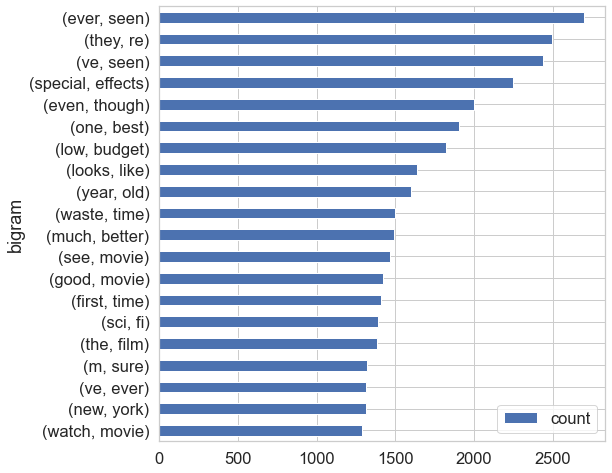

In [20]:
fig, ax = plt.subplots(figsize=(8, 8))
bigram_df.sort_values(by='count').plot.barh(x='bigram',
                      y='count',
                      ax=ax)

In [21]:
pos =  mr['review'][mr['sentiment']=="positive"]
neg =  mr['review'][mr['sentiment']=="negative"]
pos = pos.str.split()
neg = neg.str.split()

In [34]:
from nltk import bigrams
# Create list of lists containing bigrams in tweets
pos_bigram = [list(bigrams(review)) for review in pos]

# View bigrams for the first tweet
pos_bigram[0]

[('one', 'reviewers'),
 ('reviewers', 'mentioned'),
 ('mentioned', 'watching'),
 ('watching', 'oz'),
 ('oz', 'episode'),
 ('episode', 'hooked'),
 ('hooked', 'right'),
 ('right', 'exactly'),
 ('exactly', 'happened'),
 ('happened', 'me'),
 ('me', 'the'),
 ('the', 'first'),
 ('first', 'thing'),
 ('thing', 'struck'),
 ('struck', 'oz'),
 ('oz', 'brutality'),
 ('brutality', 'unflinching'),
 ('unflinching', 'scenes'),
 ('scenes', 'violence'),
 ('violence', 'set'),
 ('set', 'right'),
 ('right', 'word'),
 ('word', 'go'),
 ('go', 'trust'),
 ('trust', 'me'),
 ('me', 'show'),
 ('show', 'faint'),
 ('faint', 'hearted'),
 ('hearted', 'timid'),
 ('timid', 'show'),
 ('show', 'pulls'),
 ('pulls', 'punches'),
 ('punches', 'regards'),
 ('regards', 'drugs'),
 ('drugs', 'sex'),
 ('sex', 'violence'),
 ('violence', 'hardcore'),
 ('hardcore', 'classic'),
 ('classic', 'use'),
 ('use', 'word'),
 ('word', 'it'),
 ('it', 'called'),
 ('called', 'oz'),
 ('oz', 'nickname'),
 ('nickname', 'given'),
 ('given', 'oswald'

In [41]:
posbigrams = list(itertools.chain(*pos_bigram))
# Create counter of words in clean bigrams
posbi_counts = collections.Counter(posbigrams)
posbi_df = pd.DataFrame(posbi_counts.most_common(20),
                             columns=['bigram', 'count'])

posbi_df

,bigram,count
0,"(one, best)",1670
1,"(ve, seen)",1178
2,"(even, though)",1099
3,"(ever, seen)",971
4,"(first, time)",957
5,"(they, re)",942
6,"(new, york)",854
7,"(the, film)",853
8,"(special, effects)",806
9,"(must, see)",776


<AxesSubplot:ylabel='bigram'>

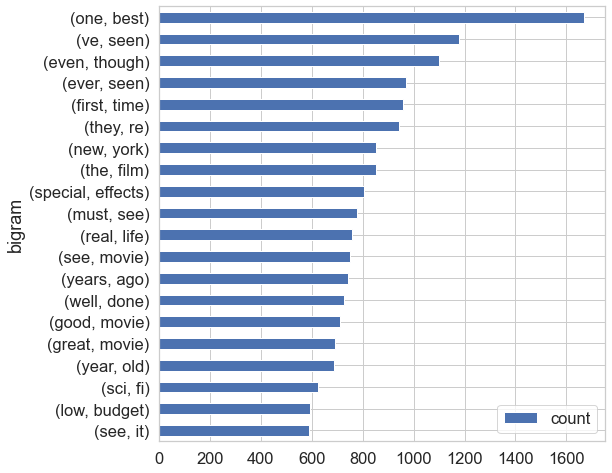

In [42]:
fig, ax = plt.subplots(figsize=(8, 8))
posbi_df.sort_values(by='count').plot.barh(x='bigram',
                      y='count',
                      ax=ax)

In [38]:
from nltk import bigrams
# Create list of lists containing bigrams in tweets
neg_bigram = [list(bigrams(review)) for review in neg]

# View bigrams for the first tweet
neg_bigram[0]

[('basically', 'there'),
 ('there', 'family'),
 ('family', 'little'),
 ('little', 'boy'),
 ('boy', 'jake'),
 ('jake', 'thinks'),
 ('thinks', 'there'),
 ('there', 'zombie'),
 ('zombie', 'closet'),
 ('closet', 'parents'),
 ('parents', 'fighting'),
 ('fighting', 'time'),
 ('time', 'this'),
 ('this', 'movie'),
 ('movie', 'slower'),
 ('slower', 'soap'),
 ('soap', 'opera'),
 ('opera', 'suddenly'),
 ('suddenly', 'jake'),
 ('jake', 'decides'),
 ('decides', 'become'),
 ('become', 'rambo'),
 ('rambo', 'kill'),
 ('kill', 'zombie'),
 ('zombie', 'ok'),
 ('ok', 'first'),
 ('first', 'going'),
 ('going', 'make'),
 ('make', 'film'),
 ('film', 'must'),
 ('must', 'decide'),
 ('decide', 'thriller'),
 ('thriller', 'drama'),
 ('drama', 'drama'),
 ('drama', 'movie'),
 ('movie', 'watchable'),
 ('watchable', 'parents'),
 ('parents', 'divorcing'),
 ('divorcing', 'arguing'),
 ('arguing', 'like'),
 ('like', 'real'),
 ('real', 'life'),
 ('life', 'jake'),
 ('jake', 'closet'),
 ('closet', 'totally'),
 ('totally', 'r

In [43]:
negbigrams = list(itertools.chain(*neg_bigram))
# Create counter of words in clean bigrams
negbi_counts = collections.Counter(negbigrams)
negbi_df = pd.DataFrame(negbi_counts.most_common(20),
                             columns=['bigram', 'count'])

negbi_df

,bigram,count
0,"(ever, seen)",1729
1,"(they, re)",1551
2,"(special, effects)",1443
3,"(waste, time)",1430
4,"(ve, seen)",1261
5,"(looks, like)",1234
6,"(low, budget)",1228
7,"(much, better)",1006
8,"(one, worst)",954
9,"(look, like)",938


<AxesSubplot:ylabel='bigram'>

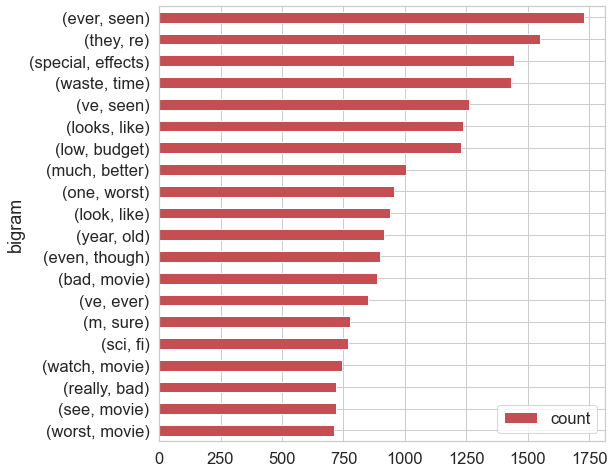

In [45]:
fig, ax = plt.subplots(figsize=(8, 8))
negbi_df.sort_values(by='count').plot.barh(x='bigram',
                      y='count',
                      ax=ax, color = 'r')

In [46]:
terms_bigram[3]

[('basically', 'there'),
 ('there', 'family'),
 ('family', 'little'),
 ('little', 'boy'),
 ('boy', 'jake'),
 ('jake', 'thinks'),
 ('thinks', 'there'),
 ('there', 'zombie'),
 ('zombie', 'closet'),
 ('closet', 'parents'),
 ('parents', 'fighting'),
 ('fighting', 'time'),
 ('time', 'this'),
 ('this', 'movie'),
 ('movie', 'slower'),
 ('slower', 'soap'),
 ('soap', 'opera'),
 ('opera', 'suddenly'),
 ('suddenly', 'jake'),
 ('jake', 'decides'),
 ('decides', 'become'),
 ('become', 'rambo'),
 ('rambo', 'kill'),
 ('kill', 'zombie'),
 ('zombie', 'ok'),
 ('ok', 'first'),
 ('first', 'going'),
 ('going', 'make'),
 ('make', 'film'),
 ('film', 'must'),
 ('must', 'decide'),
 ('decide', 'thriller'),
 ('thriller', 'drama'),
 ('drama', 'drama'),
 ('drama', 'movie'),
 ('movie', 'watchable'),
 ('watchable', 'parents'),
 ('parents', 'divorcing'),
 ('divorcing', 'arguing'),
 ('arguing', 'like'),
 ('like', 'real'),
 ('real', 'life'),
 ('life', 'jake'),
 ('jake', 'closet'),
 ('closet', 'totally'),
 ('totally', 'r